INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
WARNING    'Im_z' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value array([-0.9       , -0.86035479, -0.81487793, ...,  0.93378903,
        0.93378903,  0.93378903]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Re_z' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value array([-0.2       , -0.00562935,  0.17669621, ...,  0.75205423,
        0.75205423,  0.75205423]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.00s, trying other methods took 0.02s). [brian2.stateupdaters.base.method_choice

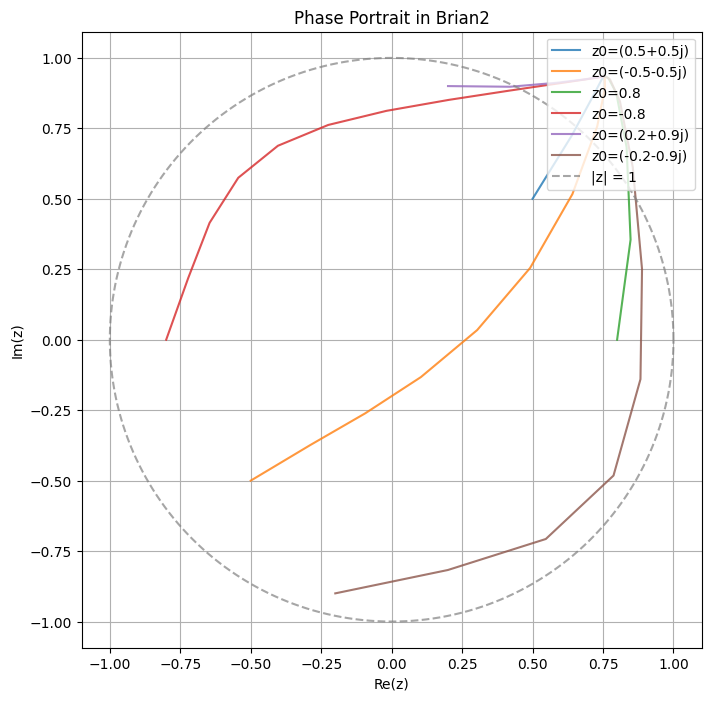

In [6]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
K = 4.5          # Coupling strength (dimensionless)
F = 3.5          # Forcing amplitude (dimensionless)
Delta = 1.0      # Dissipation (dimensionless)
Omega = 1.4      # Frequency mismatch (dimensionless)
t_sim = 50 * ms  # Simulation time
dt = 0.05 * ms   # Time step

# Initial conditions
initial_conditions = [
    0.5 + 0.5j, -0.5 - 0.5j, 0.8, -0.8, 0.2 + 0.9j, -0.2 - 0.9j
]

# Normalize time and ensure all terms are dimensionless
model_eqs = '''
dRe_z/dt = (0.5 * ((K * Re_z - K * Im_z + F) 
                 - (Re_z**2 - Im_z**2) * (K * Re_z + F) 
                 - 2 * Re_z * Im_z * K * Im_z) 
                 - (Delta * Re_z - Omega * Im_z)) / ms : 1
dIm_z/dt = (0.5 * ((K * Im_z + K * Re_z + F) 
                 - (Im_z**2 - Re_z**2) * (K * Im_z + F) 
                 - 2 * Im_z * Re_z * K * Re_z) 
                 - (Delta * Im_z + Omega * Re_z)) / ms : 1
K : 1  # Dimensionless
F : 1  # Dimensionless
Delta : 1  # Dimensionless
Omega : 1  # Dimensionless
'''

# Create a NeuronGroup for each initial condition
trajectories = []
for z0 in initial_conditions:
    G = NeuronGroup(1, model=model_eqs)
    G.Re_z = z0.real  # Set initial real part
    G.Im_z = z0.imag  # Set initial imaginary part
    G.K = K  # Assign parameters
    G.F = F
    G.Delta = Delta
    G.Omega = Omega

    # Record the dynamics
    M = StateMonitor(G, ['Re_z', 'Im_z'], record=True)
    run(t_sim)
    trajectories.append((M.Re_z[0], M.Im_z[0]))  # Append trajectory for this initial condition

# Plot the results
plt.figure(figsize=(8, 8))

# Plot each trajectory in the complex plane
for z0, (Re_z, Im_z) in zip(initial_conditions, trajectories):
    plt.plot(Re_z, Im_z, label=f"z0={z0}", alpha=0.8)

# Plot the unit circle for reference
theta = np.linspace(0, 2 * np.pi, 500)
plt.plot(np.cos(theta), np.sin(theta), '--', color="gray", alpha=0.7, label="|z| = 1")

# Labels and formatting
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Phase Portrait in Brian2")
plt.axis("equal")
plt.grid()
plt.legend(loc="upper right")
plt.show()
